# Scaling of Various Geometric Processes

In [19]:
import os
files = [d for d in os.listdir('timescaling') if d[0] == 'h']

In [20]:
def info_from_file(file):
    h11 = int(file.split("_")[1])
    s = file.split("_")[2]
    poly = int(s[s.index('y')+1:s.index('.')])
    f = open("timescaling/"+file,'r')
    flines = f.readlines()
    to_ret = [(h11,poly)]
    for idx, line in enumerate(flines):
        to_ret.append([float(k) for k in line.split(',')])
    return to_ret

raw_data = [info_from_file(file) for file in files]

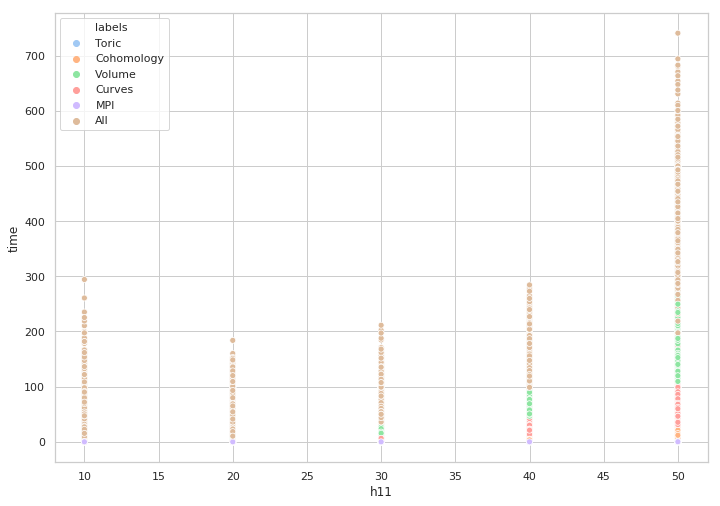

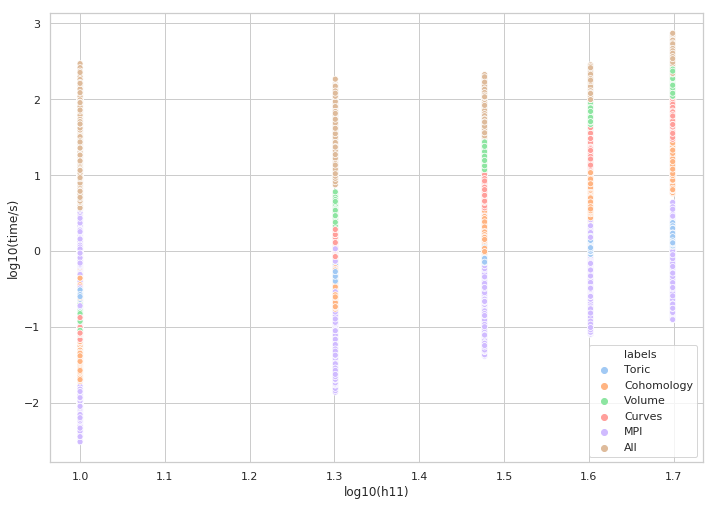

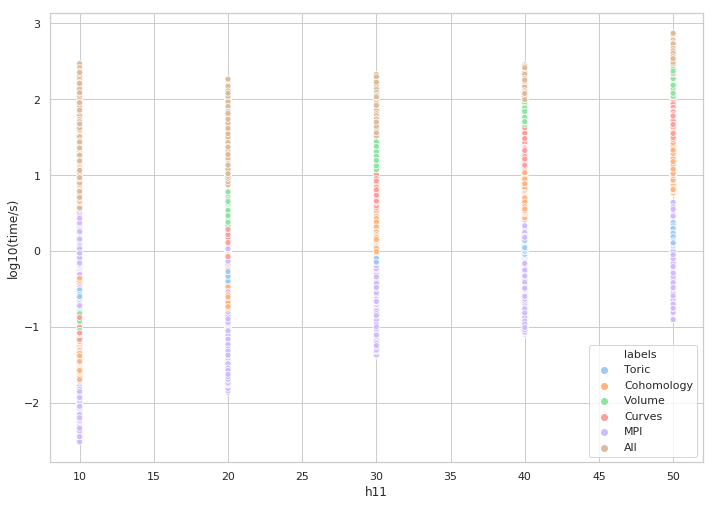

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

label_dict = {0: "Toric", 1:"Cohomology", 2:"Volume", 3: "Curves", 4: "MPI", 5: "All"}

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

h11s, polys, times, labels = [], [], [], []
for data in raw_data:
    for i in range(len(data[1])):
        h11s.append(data[0][0])
        polys.append(data[0][1])
        times.append(data[1][i])
        labels.append(label_dict[i])
        
plt.legend(loc='upper right')
sns.scatterplot(x='h11',y='time', hue='labels',
               data=pd.DataFrame({'h11':h11s,'time':times,'labels':labels}))
plt.show()

plt.legend(loc='upper right')
sns.scatterplot(x='log10(h11)',y='log10(time/s)', hue='labels',
               data=pd.DataFrame({'log10(h11)':[np.log10(k) for k in h11s],
                                  'log10(time/s)':[np.log10(k) for k in times],'labels':labels}))
plt.show()

plt.legend(loc='upper right')
sns.scatterplot(x='h11',y='log10(time/s)', hue='labels',
               data=pd.DataFrame({'h11':h11s,
                                  'log10(time/s)':[np.log10(k) for k in times],'labels':labels}))
plt.show()

# plt.legend(loc='upper right')
# sns.lmplot(x='log10(numrays)',y='log10(time/s)', hue='labels',
#                data=pd.DataFrame({'log10(numrays)':[np.log10(k) for k in Ns],
#                                   'log10(time/s)':[np.log10(k) for k in times],'labels':labels}))
# plt.show()

In [22]:
data=pd.DataFrame({'log10h11':[np.log10(k) for k in h11s],
                                  'log10t':[np.log10(k) for k in times],'labels':labels})

# data_fit = data.drop(data[data.labels != "Toric"].index)
# from sklearn import datasets, linear_model
# length = data_fit.log10N.shape[0]
# regr = linear_model.LinearRegression()
# regr.fit(data_fit.log10N.values.reshape(length,1), data_fit.log10T.values.reshape(length,1))
# print regr.coef_

# data_fit = data.drop(data[data.labels != "Cohomology"].index)
# from sklearn import datasets, linear_model
# length = data_fit.log10N.shape[0]
# regr = linear_model.LinearRegression()
# regr.fit(data_fit.log10N.values.reshape(length,1), data_fit.log10T.values.reshape(length,1))
# print regr.coef_

# data_fit = data.drop(data[data.labels != "Volume"].index)
# from sklearn import datasets, linear_model
# length = data_fit.log10N.shape[0]
# regr = linear_model.LinearRegression()
# regr.fit(data_fit.log10N.values.reshape(length,1), data_fit.log10T.values.reshape(length,1))
# print regr.coef_

# data_fit = data.drop(data[data.labels != "Curves"].index)
# from sklearn import datasets, linear_model
# length = data_fit.log10N.shape[0]
# regr = linear_model.LinearRegression()
# regr.fit(data_fit.log10N.values.reshape(length,1), data_fit.log10T.values.reshape(length,1))
# print regr.coef_

# data_fit = data.drop(data[data.labels != "All"].index)
# from sklearn import datasets, linear_model
# length = data_fit.log10N.shape[0]
# regr = linear_model.LinearRegression()
# regr.fit(data_fit.log10N.values.reshape(length,1), data_fit.log10T.values.reshape(length,1))
# print regr.coef_, regr.intercept_

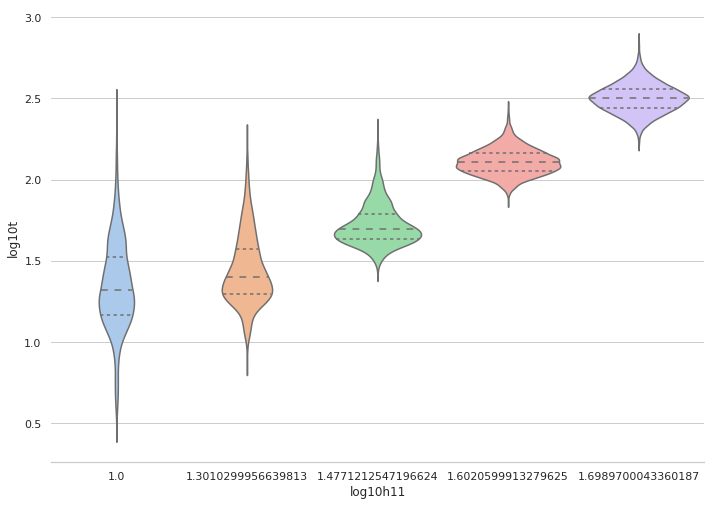

In [26]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="log10h11", y="log10t",
               split=True, inner="quart",
               data=data[data.labels == 'All'])
sns.despine(left=True)

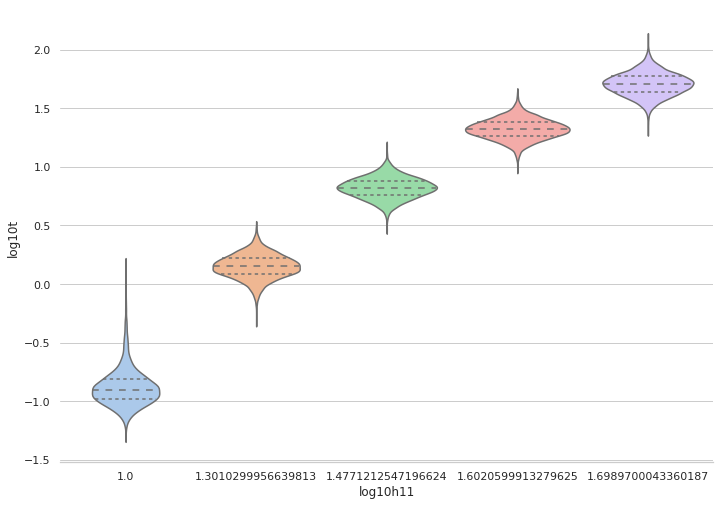

In [24]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="log10h11", y="log10t",
               split=True, inner="quart",
               data=data[data.labels == 'Curves'])
sns.despine(left=True)

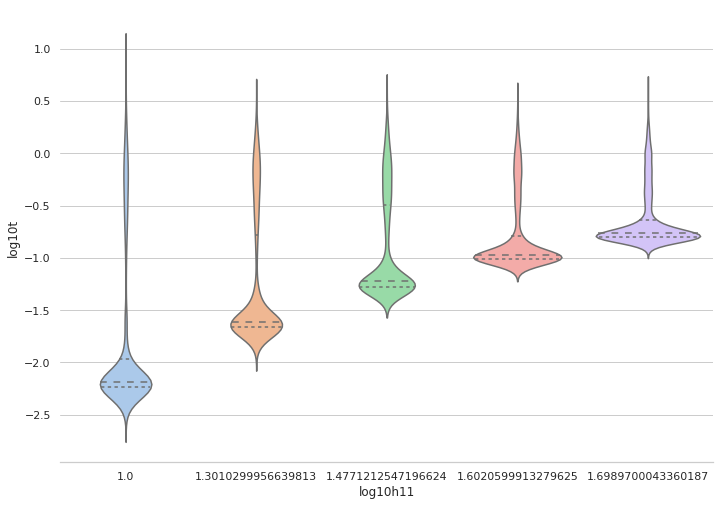

In [25]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="log10h11", y="log10t",
               split=True, inner="quart",
               data=data[data.labels == 'MPI'])
sns.despine(left=True)

In [17]:
## Scaling Coefficients of Various Processes

In [18]:
from sklearn import linear_model
def scaling(dfx, dfy): # pass df.x and df.y, repl x and y appropriately
    regr = linear_model.LinearRegression()
    X = dfx.values.reshape(-1,1)
    y = dfy.values.reshape(-1,1)
    regr.fit(X,y)
    return regr.coef_[0]

cur_lab = "All"
data_new = data[data.labels == cur_lab]
#print scaling(data[data.labels == 'All'].,)